In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from copyreg import pickle


In [34]:
df = pd.read_csv('titanic.csv')

In [35]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [40]:
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [43]:
df["Sex"]=df['Sex'].map({"male":0,"female":1})


In [44]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [45]:
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})


In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [47]:
X=df.drop("Survived",axis=1)
y=df["Survived"]


In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [49]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model  import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
y_pred=model.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [54]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification_report :\n",classification_report(y_test,y_pred))
print("Confusion_matrix :\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.7988826815642458
Classification_report :
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion_matrix :
 [[89 16]
 [20 54]]


In [55]:

new_passenger = np.array([[3, 1, 26, 0, 0, 7.9, 0]])

prediction = model.predict(new_passenger)
probability = model.predict_proba(new_passenger)

print("Survived (1) / Not Survived (0):", prediction)
print("Probability [Not Survived, Survived]:", probability)


Survived (1) / Not Survived (0): [1]
Probability [Not Survived, Survived]: [[0.35889876 0.64110124]]


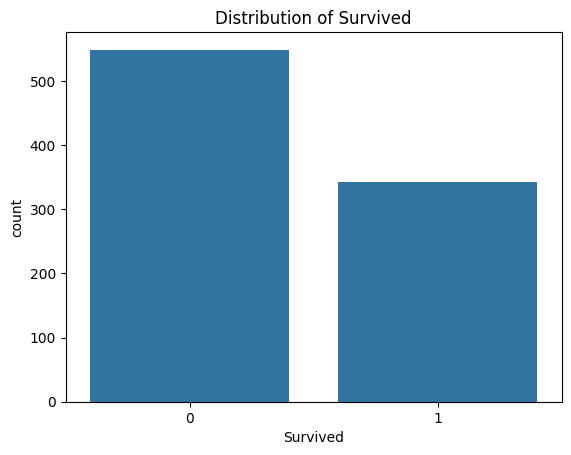

In [56]:
sns.countplot(x="Survived",data=df)
plt.title("Distribution of Survived")
plt.show()

In [57]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
886,0,2,0,27.0,0,0,13.00,0,1,1
887,1,1,1,19.0,0,0,30.00,0,1,1
888,0,3,1,28.0,1,2,23.45,0,4,0
889,1,1,0,26.0,0,0,30.00,1,1,1
890,0,3,0,32.0,0,0,7.75,2,1,1


In [58]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    C=1.0,
    max_iter=1000
)


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_


In [61]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test_scaled)

print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Improved Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



A logistic regression model was implemented to predict Titanic passenger survival with nearly 80% accuracy. The model showed balanced classification performance and consistent results after tuning, proving its effectiveness as a baseline machine learning model.


In [62]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("titanic.csv")

# Preprocessing
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Save model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model trained and saved successfully!")


Model trained and saved successfully!
